In [17]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import requests
import os

In [24]:
FILENAME = "what if-reviews.xlsx"
MOVIE_TITLE = FILENAME.replace("-reviews.xlsx", '').title()

In [27]:
df = pd.read_excel(FILENAME)
df.head()

,reviews
0,I liked the first season better
1,S1=Amazing S2=Meh
2,Cool series with interesting twists n tales.
3,"Great scenarios, but varies between episode"
4,Doctor Strange Episode...Wow


In [28]:
sid = SentimentIntensityAnalyzer()

df['scores'] = df['reviews'].apply(lambda review: sid.polarity_scores(review))

df['compound_score']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df['sentiment'] = df['compound_score'].apply(lambda c: 'pos' if c > 0 else ('neu' if c == 0.0 else 'neg'))

df.head()

,reviews,scores,compound_score,sentiment
0,I liked the first season better,"{'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'comp...",0.6908,pos
1,S1=Amazing S2=Meh,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
2,Cool series with interesting twists n tales.,"{'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'comp...",0.6124,pos
3,"Great scenarios, but varies between episode","{'neg': 0.0, 'neu': 0.662, 'pos': 0.338, 'comp...",0.3716,pos
4,Doctor Strange Episode...Wow,"{'neg': 0.474, 'neu': 0.526, 'pos': 0.0, 'comp...",-0.2023,neg


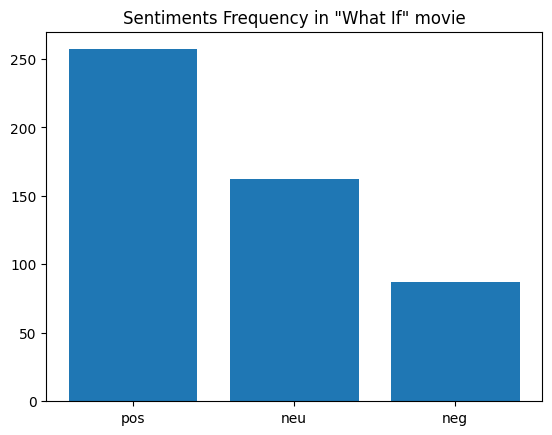

In [30]:
# Distribution / frequency for each sentiments (positive, negative, and neutral)
plt.bar(df['sentiment'].value_counts().index, df['sentiment'].value_counts())
plt.title(f'Sentiments Frequency in "{MOVIE_TITLE}" movie')
plt.show()

In [38]:
def merge_text(df, column, category):
    text = ' '.join(df[df[column] == category]['reviews'])
    return text

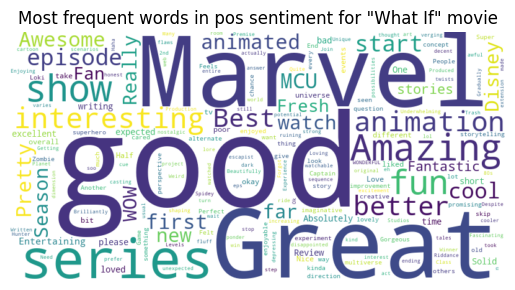

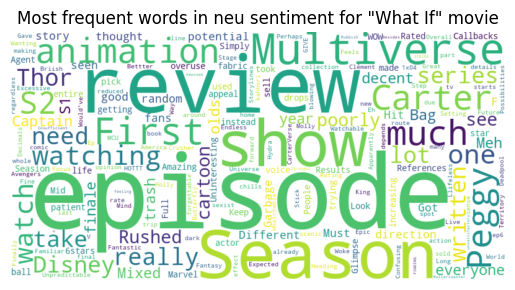

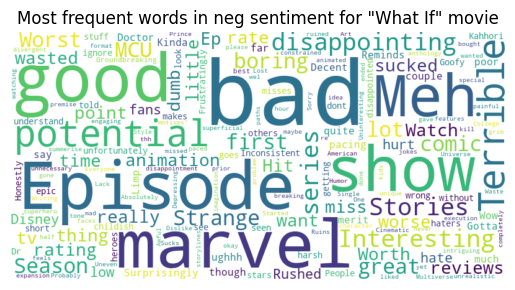

In [40]:
# Show wordcloud / most frequent words for each sentiment
for i in ['pos', 'neu', 'neg']:
    text = merge_text(df,'sentiment',i)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Most frequent words in {i} sentiment for "{MOVIE_TITLE}" movie')
    plt.axis('off')
    plt.show()